### Import Libraries

In [1]:
import pandas as pd                  # Pandas
import numpy as np                   # Numpy
from matplotlib import pyplot as plt # Matplotlib

# Package to implement ML Algorithms
import sklearn
from sklearn.ensemble import RandomForestClassifier # Random Forest

# Package for data partitioning
from sklearn.model_selection import train_test_split

# Package for generating confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Package for generating classification report
from sklearn.metrics import classification_report

# Package to record time
import time

# Module to save and load Python objects to and from files
import pickle 

# Ignore Deprecation Warnings
import warnings
warnings.filterwarnings('ignore')

# Display inline plots as vector-based (svg)
%config InlineBackend.figure_formats = ['svg']

%matplotlib inline

### Load Dataset

In [3]:
# Import Data
df = pd.read_csv('student_sleep_patterns.csv')
df.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [4]:
df.columns

Index(['Student_ID', 'Age', 'Gender', 'University_Year', 'Sleep_Duration',
       'Study_Hours', 'Screen_Time', 'Caffeine_Intake', 'Physical_Activity',
       'Sleep_Quality', 'Weekday_Sleep_Start', 'Weekend_Sleep_Start',
       'Weekday_Sleep_End', 'Weekend_Sleep_End'],
      dtype='object')

In [5]:
# Select input and output features
X = df.drop(columns = ['Sleep_Quality', 'Student_ID'])
y = df['Sleep_Quality'].astype(str)

X_encoded = pd.get_dummies(X)
X_encoded.head()

,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Gender_Female,Gender_Male,Gender_Other,University_Year_1st Year,University_Year_2nd Year,University_Year_3rd Year,University_Year_4th Year
0,24,7.7,7.9,3.4,2,37,14.16,4.05,7.41,7.06,False,False,True,False,True,False,False
1,21,6.3,6.0,1.9,5,74,8.73,7.10,8.21,10.21,False,True,False,True,False,False,False
2,22,5.1,6.7,3.9,5,53,20.00,20.47,6.88,10.92,False,True,False,False,False,False,True
3,24,6.3,8.6,2.8,4,55,19.82,4.08,6.69,9.42,False,False,True,False,False,False,True
4,20,4.7,2.7,2.7,0,85,20.98,6.12,8.98,9.01,False,True,False,False,False,False,True


In [6]:
# Data partitioning into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X_encoded, y, test_size = 0.2, random_state = 42)

### Implement Random Forest Regressor

In [7]:
# Define your model
clf = RandomForestClassifier(random_state = 42)

In [8]:
# Fit the model
start = time.time()            # Start Time
clf.fit(train_X, train_y)  
stop = time.time()             # End Time
print(f"Training time: {stop - start}s")

Training time: 0.07233500480651855s


#### Evaluate Prediction Performance on Test Set

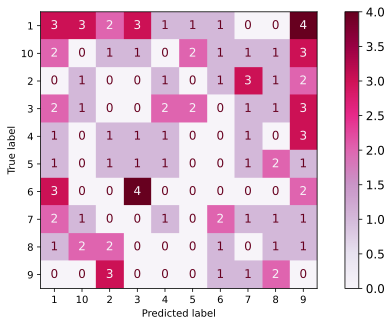

In [9]:
# Predict Test Set
y_pred = clf.predict(test_X)

# Now generate confusion matrix
cm = confusion_matrix(test_y, y_pred, labels = clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = clf.classes_)

# Specify figure size
fig, ax = plt.subplots(figsize = (10, 5))
plt.rcParams.update({'font.size': 12})

# Display Confusion Matrix
disp.plot(cmap = 'PuRd', ax = ax);
plt.savefig("cmrf.svg")

In [10]:
report = classification_report(test_y, y_pred, output_dict = True)
report_df = pd.DataFrame(report)
report_df.to_csv('RF.csv', index = True)
report_df.head()


,1,10,2,3,4,5,6,7,8,9,accuracy,macro avg,weighted avg
precision,0.200000,0.0,0.0,0.0,0.142857,0.0,0.0,0.111111,0.111111,0.0,0.06,0.056508,0.066317
recall,0.166667,0.0,0.0,0.0,0.125000,0.0,0.0,0.111111,0.125000,0.0,0.06,0.052778,0.060000
f1-score,0.181818,0.0,0.0,0.0,0.133333,0.0,0.0,0.111111,0.117647,0.0,0.06,0.054391,0.062806
support,18.000000,12.0,9.0,12.0,8.000000,8.0,9.0,9.000000,8.000000,7.0,0.06,100.000000,100.000000


#### Feature Imp

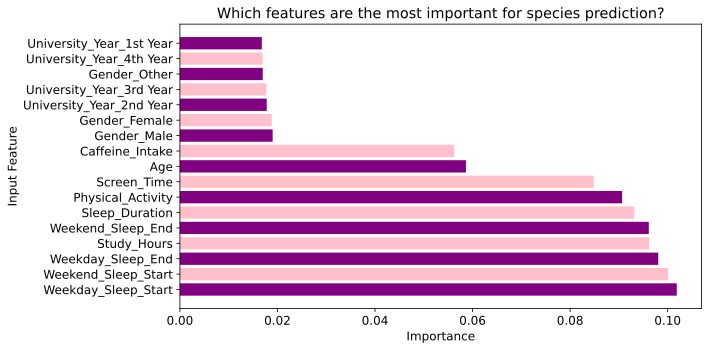

In [11]:
# Storing importance values from the trained model
importance = clf.feature_importances_

# Storing feature importance as a dataframe
feature_imp = pd.DataFrame(list(zip(train_X.columns, importance)),
               columns = ['Feature', 'Importance'])

feature_imp = feature_imp.sort_values('Importance', ascending = False).reset_index(drop = True)

# Bar plot
plt.figure(figsize=(10, 5))
plt.barh(feature_imp['Feature'], feature_imp['Importance'], color = ['purple', 'pink'])

plt.xlabel("Importance")
plt.ylabel("Input Feature")
plt.title('Which features are the most important for species prediction?') 
plt.tight_layout()
plt.savefig("RF_imp.svg");

In [12]:
# Pickle file: saving the trained DT model
# Creating the file where we want to write the model
rf_pickle = open('RF_ML.pickle', 'wb') 

# Write DT model to the file
pickle.dump(clf, rf_pickle) 

# Close the file
rf_pickle.close() 